In [1]:
#import modules
%run ../../load_main.py
from Air_Quality_notebooks import utils as utl
from WRFChemToolkit.analysis import statistics as st, aerosols_202 as aer
import matplotlib.pyplot as plt

# PM25: 24-h average

In [2]:
# get dataframe
pm25=pd.read_excel('pm25_changes.xlsx')
pm25=pm25.rename({'Unnamed: 0':''},axis=1).set_index('')

In [3]:
t='_abs' # get absoulte change in PM
d = pm25.filter(regex=t).T
d=d.rename(index={s: int((float((s.split('_')[0].split('x')[1]))-1)*100+100) for s in d.index})
d=d.rename(columns={'DOM':'NCT_DOM','TRA':'NCT_TRA','IPO':'NCT_IPO'})

In [4]:
d

,BASE,NCT_DOM,NCT_IPO,NCT_TRA,NCR_DOM,NCR_IPO,NCR_TRA,ALL
0,0.0,-1.634223,-5.268275,-8.261264,-10.539411,-13.068476,-6.385497,-52.422062
25,0.0,-1.226790,-3.947122,-6.415282,-7.898113,-9.585557,-5.356424,-35.951546
50,0.0,-0.817924,-2.629726,-4.302026,-5.286133,-6.273949,-3.522270,-23.310423
75,0.0,-0.655682,-1.314198,-2.401300,-2.659419,-3.086879,-1.743656,-11.484460
125,0.0,0.409575,1.315644,2.170295,2.654059,2.995811,1.720020,11.176758
150,0.0,0.818681,2.633481,4.347814,5.309531,5.908932,3.417698,22.125584
175,0.0,1.227323,3.949996,6.530067,7.965119,8.752988,5.092178,32.918331
200,0.0,1.635774,5.265594,8.712415,10.619746,11.538540,6.742924,43.619400


In [5]:
# add total change and percentace of nonlinearity due to interactions among sectors.
d['SUM']= (d.drop('ALL', axis=1).sum(axis=1))

In [6]:
d['nonlinear%']= (d['ALL']-d['SUM'])/abs(d['SUM'])

In [7]:
d

,BASE,NCT_DOM,NCT_IPO,NCT_TRA,NCR_DOM,NCR_IPO,NCR_TRA,ALL,SUM,nonlinear%
0,0.0,-1.634223,-5.268275,-8.261264,-10.539411,-13.068476,-6.385497,-52.422062,-45.157146,-0.160881
25,0.0,-1.226790,-3.947122,-6.415282,-7.898113,-9.585557,-5.356424,-35.951546,-34.429288,-0.044214
50,0.0,-0.817924,-2.629726,-4.302026,-5.286133,-6.273949,-3.522270,-23.310423,-22.832029,-0.020953
75,0.0,-0.655682,-1.314198,-2.401300,-2.659419,-3.086879,-1.743656,-11.484460,-11.861135,0.031757
125,0.0,0.409575,1.315644,2.170295,2.654059,2.995811,1.720020,11.176758,11.265404,-0.007869
150,0.0,0.818681,2.633481,4.347814,5.309531,5.908932,3.417698,22.125584,22.436136,-0.013842
175,0.0,1.227323,3.949996,6.530067,7.965119,8.752988,5.092178,32.918331,33.517671,-0.017881
200,0.0,1.635774,5.265594,8.712415,10.619746,11.538540,6.742924,43.619400,44.514992,-0.020119


In [8]:
d=d.rename({'NCT_TRA':'Delhi_TRA','NCT_DOM':'Delhi_DOM','NCT_IPO':'Delhi_IPO'},axis=1)

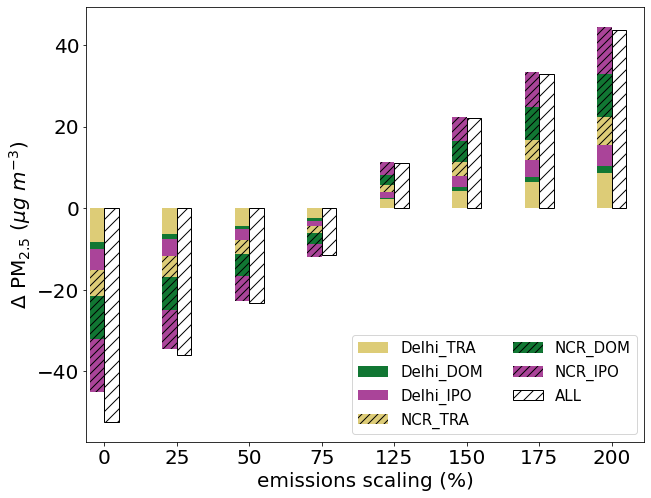

In [9]:
# PLOT
#colorsNCT=["#56B4E9","#009E73","#E69F00"] 
#colorsNCR=["#0072B2","#CC79A7","#999999"] 

sectors=['T_TOT_NCT','D_TOT_NCT','IPO_TOT_NCT','T_TOT_NCR','D_TOT_NCR','IPO_TOT_NCR']
colorsNCT=['#DDCC77','#117733','#AA4499']
colorsNCR=colorsNCT

ax = d[['Delhi_TRA','Delhi_DOM','Delhi_IPO','NCR_TRA','NCR_DOM','NCR_IPO']].plot.bar(stacked=True, position=1,
                            width=.2,rot=0, color=colorsNCT+colorsNCR)
d[['ALL']].plot.bar(ax=ax, position=0, width=.2,color='white',hatch='//',edgecolor='black',rot=0)

for container, hatch in zip(ax.containers, ("", "","","///", "///","///")):
    for patch in container.patches:
        patch.set_hatch(hatch)

fig = ax.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(10, 8)

# Change the axes labels
ax.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel("emissions scaling (%)", fontsize=20)
plt.ylabel("$\Delta$ PM$_{2.5}$ ($\mu g~m^{-3}$)",fontsize=20) 
ax.legend(loc="lower right",ncol=2,fontsize=15)
          #bbox_to_anchor=(1.5, 0,0, 0)

In [10]:
fig.savefig('./fig4c.png', format='png', box_inches="tight",dpi=300)

# PM25: dyno cycle

In [11]:
# get dataframe
pm25h=pd.read_excel('pm25_changes_hour.xlsx').set_index(['sector','hour'])

In [12]:
pm25h

,,base_vals,x0_vals,x0_abs,x0_%,x0.25_vals,x0.25_abs,x0.25_%,x0.5_vals,x0.5_abs,x0.5_%,...,x1.25_%,x1.5_vals,x1.5_abs,x1.5_%,x1.75_vals,x1.75_abs,x1.75_%,x2_vals,x2_abs,x2_%
sector,hour,,,,,,,,,,,,,,,,,,,,,
BASE,0,95.366737,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
DOM,0,0.000000,94.681618,-0.685116,-0.745388,94.851181,-0.515557,-0.560831,95.023247,-0.343496,-0.373869,...,0.186762,95.708794,0.342050,0.372016,95.880600,0.513858,0.558650,96.051987,0.685244,0.744969
IPO,0,0.000000,88.871712,-6.495024,-6.575231,90.502670,-4.864072,-4.931111,92.124298,-3.242445,-3.289583,...,1.638889,98.596237,3.229504,3.277501,100.205246,4.838507,4.910995,101.817047,6.450304,6.546741
TRA,0,0.000000,86.952316,-8.414426,-9.061790,88.852394,-6.514353,-7.025090,91.014992,-4.351748,-4.695848,...,2.335916,99.688751,4.322007,4.664025,101.837494,6.470750,6.981991,103.974724,8.607986,9.287403
NCR_DOM,0,0.000000,81.931717,-13.435023,-13.987591,85.314644,-10.052100,-10.459560,88.658813,-6.707924,-6.977838,...,3.521370,102.130714,6.763970,7.042567,105.516090,10.149343,10.566907,108.894623,13.527887,14.084076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TRA,23,0.000000,101.196419,-11.547563,-10.544338,103.815300,-8.928670,-8.163355,106.779488,-5.964478,-5.455933,...,2.724032,118.697594,5.953617,5.446857,121.668686,8.924715,8.165621,124.632286,11.888319,10.876796
NCR_DOM,23,0.000000,97.410095,-15.333884,-13.441148,101.258949,-11.485023,-10.065195,105.068336,-7.675628,-6.725553,...,3.391428,120.478127,7.734157,6.779143,124.344864,11.600890,10.167697,128.206787,15.462816,13.552533
NCR_IPO,23,0.000000,98.705521,-14.038459,-11.808959,102.521759,-10.222211,-8.583820,106.088257,-6.655715,-5.579252,...,2.645814,119.012619,6.268646,5.226359,122.072517,9.328549,7.771083,125.108459,12.364486,10.293517


In [13]:
pm25_abs=pm25h.filter(regex='abs$', axis=1)

In [14]:
pm25_abs=pm25_abs.rename(columns={s: int((float((s.split('_')[0].split('x')[1]))-1)*100+100) for s in pm25h.columns if (s.startswith('x'))})

In [15]:
pm25_abs=pm25_abs.reset_index().set_index('sector').rename({'DOM':'NCT_DOM','TRA':'NCT_TRA','IPO':'NCT_IPO'},axis=0).reset_index()

In [16]:
pm25_abs

,sector,hour,0,25,50,75,125,150,175,200
0,BASE,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,NCT_DOM,0,-0.685116,-0.515557,-0.343496,-0.172621,0.171552,0.342050,0.513858,0.685244
2,NCT_IPO,0,-6.495024,-4.864072,-3.242445,-1.617386,1.614933,3.229504,4.838507,6.450304
3,NCT_TRA,0,-8.414426,-6.514353,-4.351748,-2.176483,2.164440,4.322007,6.470750,8.607986
4,NCR_DOM,0,-13.435023,-10.052100,-6.707924,-3.390240,3.382046,6.763970,10.149343,13.527887
...,...,...,...,...,...,...,...,...,...,...
187,NCT_TRA,23,-11.547563,-8.928670,-5.964478,-2.981091,2.977779,5.953617,8.924715,11.888319
188,NCR_DOM,23,-15.333884,-11.485023,-7.675628,-3.866320,3.868993,7.734157,11.600890,15.462816
189,NCR_IPO,23,-14.038459,-10.222211,-6.655715,-3.265080,3.169784,6.268646,9.328549,12.364486
190,NCR_TRA,23,-10.140324,-8.474260,-5.512919,-2.693240,2.601765,5.139472,7.624447,10.072727


In [17]:
pm25_abs[75].min()

-15.89003467559814

In [18]:
pm25_abs=pm25_abs.melt(id_vars=["sector",'hour'], 
        var_name="scale_factor", 
        value_name="value")

In [19]:
pm25_abs.scale_factor=pm25_abs.scale_factor.astype(float)

In [20]:
scale=pm25_abs.scale_factor.unique() 

In [21]:
hours=pm25_abs.hour.unique()

In [22]:
pm25_abs

,sector,hour,scale_factor,value
0,BASE,0,0.0,0.000000
1,NCT_DOM,0,0.0,-0.685116
2,NCT_IPO,0,0.0,-6.495024
3,NCT_TRA,0,0.0,-8.414426
4,NCR_DOM,0,0.0,-13.435023
...,...,...,...,...
1531,NCT_TRA,23,200.0,11.888319
1532,NCR_DOM,23,200.0,15.462816
1533,NCR_IPO,23,200.0,12.364486
1534,NCR_TRA,23,200.0,10.072727


In [23]:
#pm25_abs=pd.read_excel('test.xlsx')

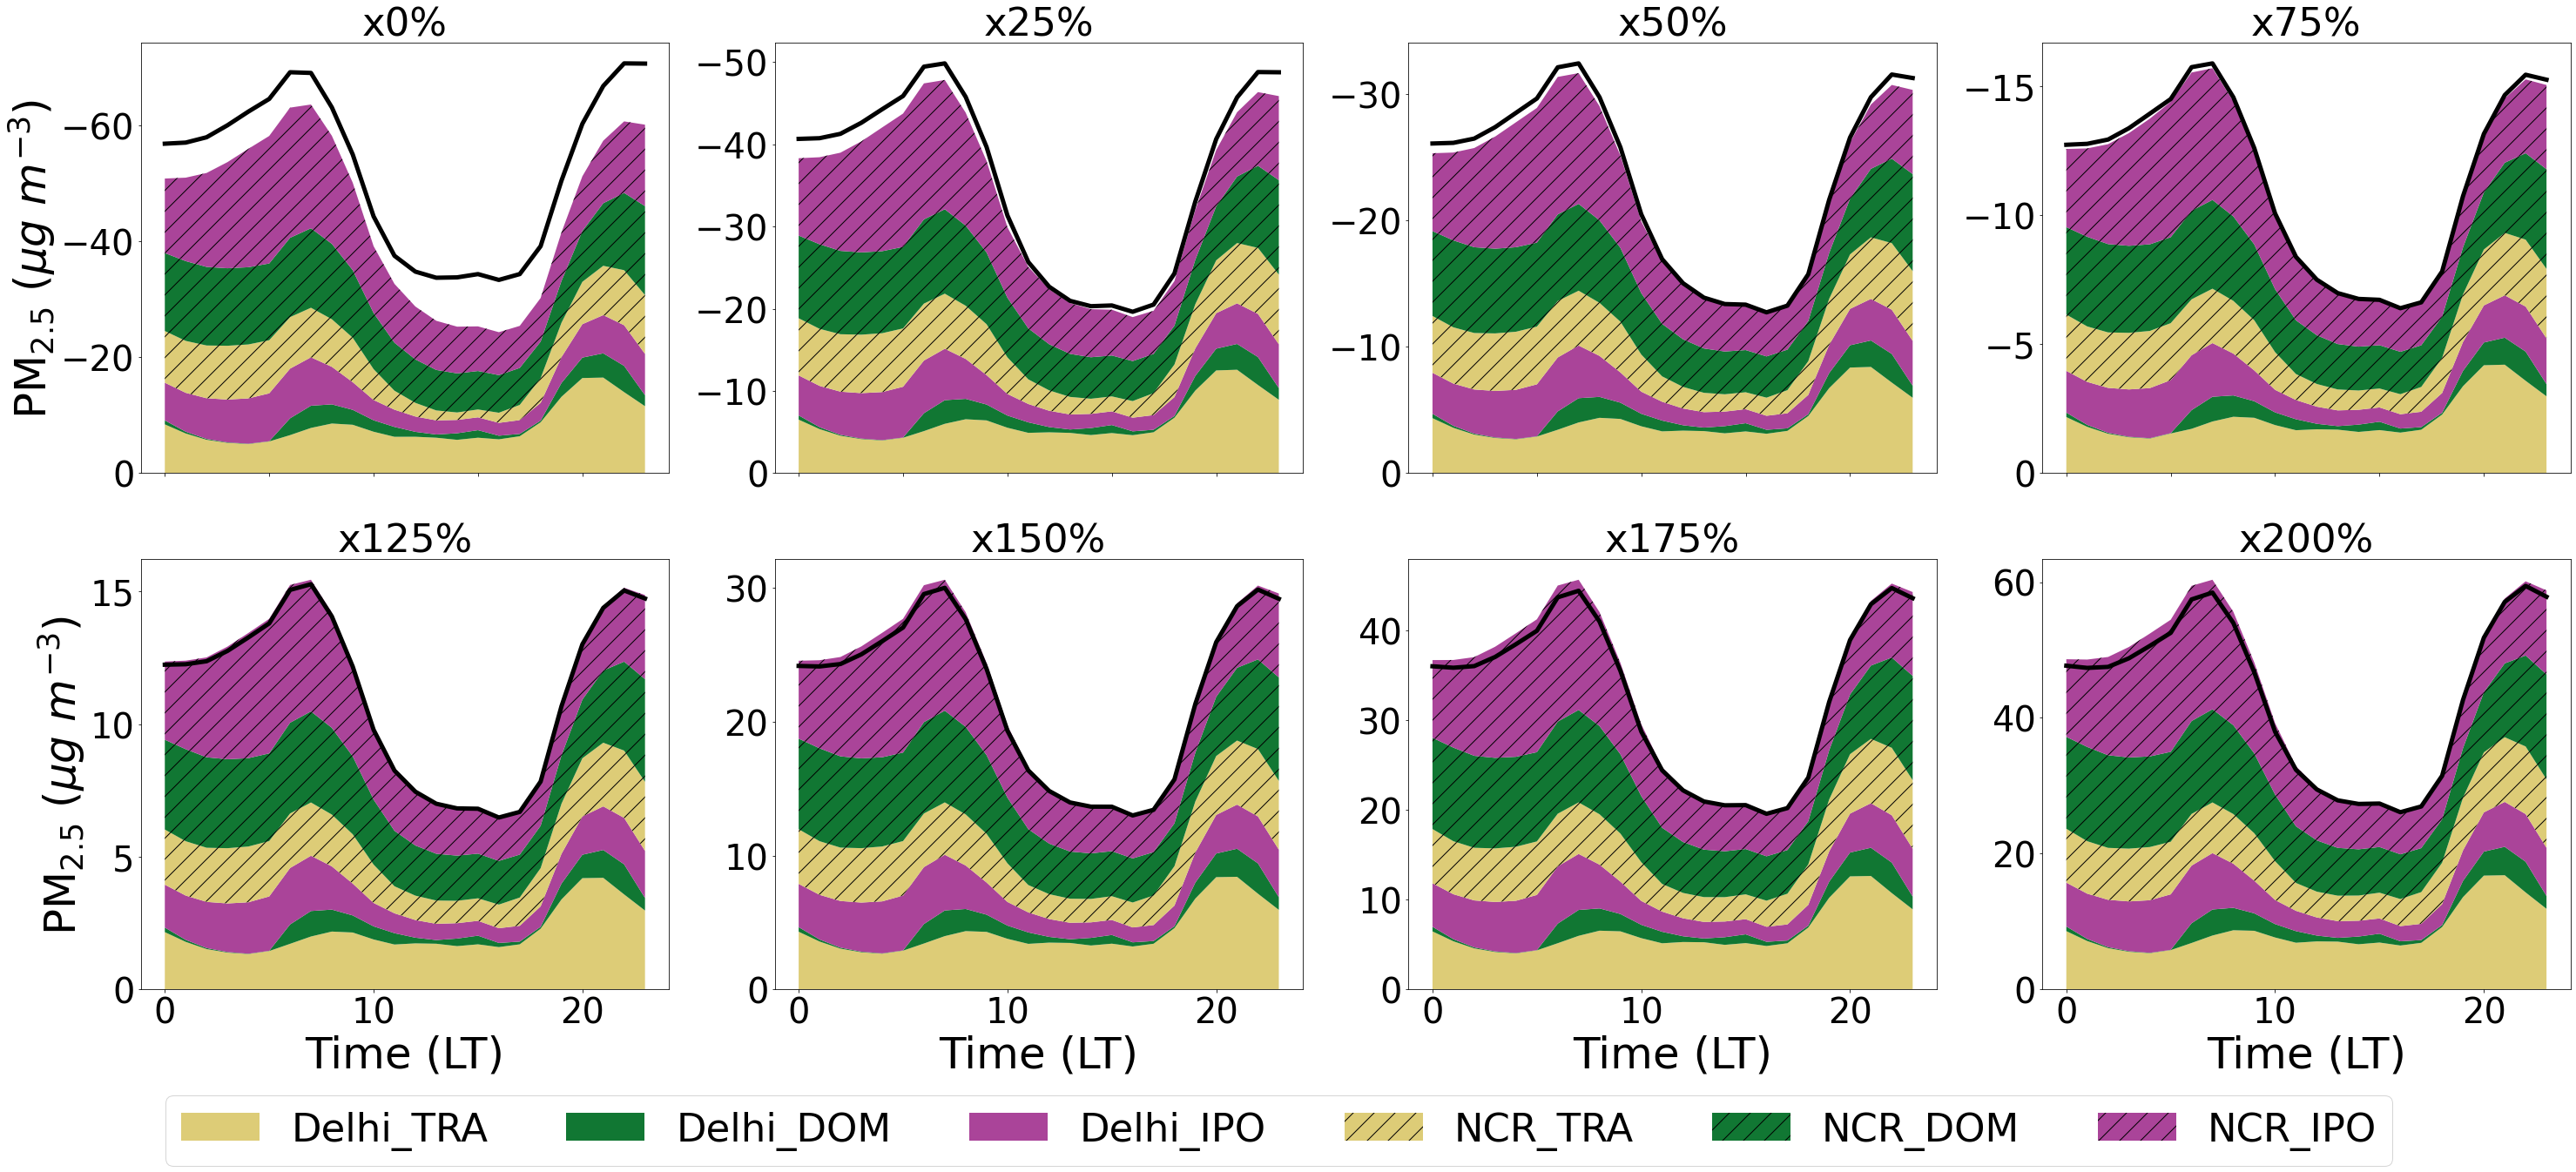

In [24]:
fig, axes = plt.subplots(2,4,figsize=(50,20))

sec=['NCT_TRA','NCT_DOM', 'NCT_IPO','NCR_TRA', 'NCR_DOM', 'NCR_IPO', ]
labels=['Delhi_TRA','Delhi_DOM','Delhi_IPO','NCR_TRA','NCR_DOM','NCR_IPO']
colors=['#DDCC77','#117733','#AA4499','#DDCC77','#117733','#AA4499']

for ax,sca in zip(fig.axes,scale):
    t = pm25_abs[(pm25_abs['scale_factor']==sca)].sort_values(by='hour')
    data=[]
    for k in sec:

        data.append(t[t['sector']==k]['value'])
    stacks= ax.stackplot(hours,data,baseline='zero',labels=labels,colors=colors)
    
    hatches=["", "","", "/","/","/"]
    for stack, hatch in zip(stacks, hatches):
        stack.set_hatch(hatch)
        stack.set_linewidth(10)

         
        
    #ax.tick_params(axis='both', which='major', labelsize=15)
    
    ax.tick_params(axis='y', which='major', labelsize=40)
    
    ax.plot(hours,t[t['sector']=='ALL']['value'], color='black', linewidth=5)   
    ax.set_title('x'+str(int(sca))+'%', fontsize=45)
    
for i,ax in zip([0,1,2,3],fig.axes):
    ax.invert_yaxis()

for i,ax in zip([0,1,2,3,4,5,6,7],fig.axes):
    if i in [4,5,6,7]: 
        ax.set_xlabel('Time (LT)', fontsize=50)
        ax.tick_params(axis='x', which='major', labelsize=40)
    else:
        ax.set_xticklabels([])
        
    if i in [0,4]: 
          ax.set_ylabel('PM$_{2.5}$ ($\mu g~m^{-3}$)', fontsize=50)
        

plt.legend( bbox_to_anchor=(0.7,-0.2),fontsize=45,ncol=8, loc='bottom left')#plt.xticks(np.arange(0, 23+1, 3.0))

In [25]:
fig.savefig('./figS7.pdf', format='pdf', box_inches="tight",dpi=300)